## Import libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None #safely disable chain assignment

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,RidgeCV,LassoCV,ElasticNetCV
from sklearn import metrics


## 0: Import Data

In [111]:
#load train.csv to dataframe
train = pd.read_csv('../datasets/train.csv')
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [112]:
train.shape

(2051, 81)

In [113]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [114]:
#load test.csv to dataframe
test = pd.read_csv('../datasets/test.csv')
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [115]:
test.shape

(879, 80)

In [116]:
#make column name lowercase and replace space with _
train.columns = train.columns.str.lower().str.replace(" ","_")
test.columns = test.columns.str.lower().str.replace(" ","_")

In [117]:
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

## 1. Data cleaning

In [118]:
#check for null in train data
train.isnull().sum()[train.isnull().sum()>0]

lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

In [119]:
#check for null in test data
test.isnull().sum()[test.isnull().sum()>0]

lot_frontage      160
alley             821
mas_vnr_type        1
mas_vnr_area        1
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
electrical          1
fireplace_qu      422
garage_type        44
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
pool_qc           875
fence             707
misc_feature      838
dtype: int64

**Investigate by each columns**: lot_frontage

In [120]:
#Check for house with lot frontage =0
train[train['lot_frontage'] ==0]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


This is to check whether there is a house with no lot frontage at all. However, there is almost no chance that the house will not have lot frontage. Thus, we will not fill this null with zero

<AxesSubplot:ylabel='Frequency'>

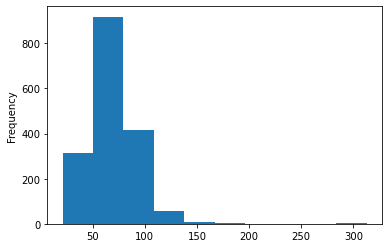

In [121]:
#Check for distribution
train['lot_frontage'].plot(kind='hist')

Seeing some outlier

<AxesSubplot:xlabel='lot_frontage', ylabel='saleprice'>

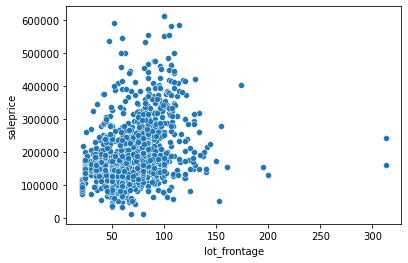

In [122]:
#check relation ship between lot_frontage and saleprice
sns.scatterplot(data=train,x='lot_frontage',y='saleprice')

In [123]:
#this might be outlier
train[train['lot_frontage']>300]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1335,1266,535427070,20,RL,313.0,27650,Pave,NaN,IR2,HLS,...,0,0,NaN,NaN,NaN,0,11,2008,WD,242000


<AxesSubplot:xlabel='lot_frontage', ylabel='lot_area'>

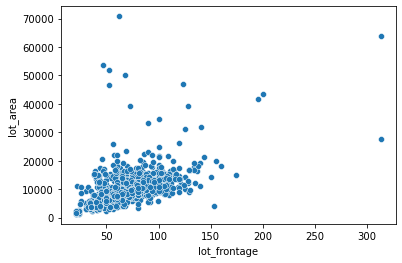

In [124]:
#check relation ship between lot_frontage and lot_area
sns.scatterplot(data=train,x='lot_frontage',y='lot_area')

In [125]:
#fill null in lot_frontage with mean: for both train and test data
lot_frontage_mean = train['lot_frontage'].mean()
train['lot_frontage'] = [x if x>0 else lot_frontage_mean for x in train['lot_frontage']]
test['lot_frontage'] = [x if x>0 else lot_frontage_mean for x in test['lot_frontage']]
train.isnull().sum()[train.isnull().sum()>0]

alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

In [126]:
test.isnull().sum()[test.isnull().sum()>0]

alley             821
mas_vnr_type        1
mas_vnr_area        1
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
electrical          1
fireplace_qu      422
garage_type        44
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
pool_qc           875
fence             707
misc_feature      838
dtype: int64

<AxesSubplot:xlabel='lot_frontage', ylabel='saleprice'>

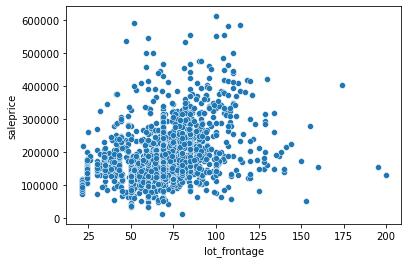

In [127]:
#decide to drop lot_frontage >300
train = train[train['lot_frontage']<300]
sns.scatterplot(data=train,x='lot_frontage',y='saleprice')

In [128]:
train.shape

(2049, 81)

**next column is alley**

In [129]:
train['alley'].dtypes

dtype('O')

In [130]:
train['alley'].value_counts() #looking in dic, NA = no alley access
#fill na with with None

Grvl    85
Pave    55
Name: alley, dtype: int64

In [131]:
train['alley'] = train['alley'].fillna('None')
test['alley'] = test['alley'].fillna('None')

In [132]:
train

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,69.0552,13517,Pave,None,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0000,11492,Pave,None,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0000,7922,Pave,None,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0000,9802,Pave,None,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0000,14235,Pave,None,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0000,11449,Pave,None,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,69.0552,12342,Pave,None,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0000,7558,Pave,None,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0000,10400,Pave,None,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


In [133]:
test.isnull().sum()[test.isnull().sum()>0]

mas_vnr_type        1
mas_vnr_area        1
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
electrical          1
fireplace_qu      422
garage_type        44
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
pool_qc           875
fence             707
misc_feature      838
dtype: int64

In [134]:
train.shape

(2049, 81)

**next column is mas_vnr_type,mas_vnr_area**

In [135]:
train['mas_vnr_type'].dtypes

dtype('O')

In [136]:
train['mas_vnr_type'].value_counts()

None       1217
BrkFace     630
Stone       167
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [137]:
train[train['mas_vnr_type'].isnull()][['mas_vnr_type','mas_vnr_area']]

,mas_vnr_type,mas_vnr_area
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN
338,NaN,NaN
431,NaN,NaN
451,NaN,NaN
591,NaN,NaN
844,NaN,NaN


0    1215
Name: mas_vnr_area, dtype: int64

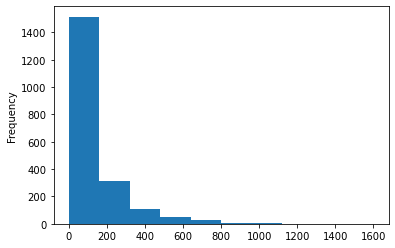

In [138]:
train['mas_vnr_area'].plot(kind='hist')
train['mas_vnr_area'].value_counts()[[0]]

In [139]:
train[train['mas_vnr_area'] ==0][['mas_vnr_type','mas_vnr_area']]

,mas_vnr_type,mas_vnr_area
2,None,0.0
3,None,0.0
4,None,0.0
5,None,0.0
8,None,0.0
...,...,...
2046,None,0.0
2047,None,0.0
2048,None,0.0
2049,None,0.0


Above is the process to make sure that if mas_vnr_type is null, mas_vnr_area is also null

From this, I will infer that when both columns are null, it means none and the area should be 0

In [140]:
#fill na with none and 0
train['mas_vnr_type'] = train['mas_vnr_type'].fillna('None')
train['mas_vnr_area'] = train['mas_vnr_area'].fillna(0)
test['mas_vnr_type'] = test['mas_vnr_type'].fillna('None')
test['mas_vnr_area'] = test['mas_vnr_area'].fillna(0)

In [141]:
train.isnull().sum()[train.isnull().sum()>0]

bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2041
fence             1649
misc_feature      1984
dtype: int64

In [142]:
test.isnull().sum()[test.isnull().sum()>0]

bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
electrical          1
fireplace_qu      422
garage_type        44
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
pool_qc           875
fence             707
misc_feature      838
dtype: int64


**next column is basement relate**

In [143]:
#select column with bmst related
[col for col in train.columns if 'bsmt' in col]

['bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'bsmt_full_bath',
 'bsmt_half_bath']

In [144]:
#investigate null by filtering bsmt_exposure is null
bsmt = [col for col in train.columns if 'bsmt' in col]
train[train['bsmt_exposure'].isnull()][bsmt]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
12,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
240,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
249,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
256,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
390,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
437,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


for all of these columns NA mean no basement which will result in area = 0, Thus, I will fill nan with 'None' and 0

In [145]:
#fill na with 0 and none
def fill_na_test_train(columns):
    '''fill nan in train data and test data with 
    - None if dtypes is object
    - 0 if dtypes is float64/int64
    columns is accepted in list
    '''
    for col in columns:
        if train[col].dtypes == 'O':
            train[col] = train[col].fillna('None')
        else:
            train[col] = train[col].fillna(0)

    for col in columns:
        if test[col].dtypes == 'O':
            test[col] = test[col].fillna('None')
        else:
            test[col] = test[col].fillna(0)
    pass

In [146]:
fill_na_test_train(bsmt)

In [147]:
train.isnull().sum()[train.isnull().sum()>0]

fireplace_qu     1000
garage_type       113
garage_yr_blt     114
garage_finish     114
garage_cars         1
garage_area         1
garage_qual       114
garage_cond       114
pool_qc          2041
fence            1649
misc_feature     1984
dtype: int64

In [148]:
test.isnull().sum()[test.isnull().sum()>0]

electrical         1
fireplace_qu     422
garage_type       44
garage_yr_blt     45
garage_finish     45
garage_qual       45
garage_cond       45
pool_qc          875
fence            707
misc_feature     838
dtype: int64

**fireplace_qu**

In [149]:
#fill na with 'None'
train['fireplace_qu'] = train['fireplace_qu'].fillna('None')
test['fireplace_qu'] = test['fireplace_qu'].fillna('None')

In [150]:
train.isnull().sum()[train.isnull().sum()>0]

garage_type       113
garage_yr_blt     114
garage_finish     114
garage_cars         1
garage_area         1
garage_qual       114
garage_cond       114
pool_qc          2041
fence            1649
misc_feature     1984
dtype: int64

In [151]:
test.isnull().sum()[test.isnull().sum()>0]

electrical         1
garage_type       44
garage_yr_blt     45
garage_finish     45
garage_qual       45
garage_cond       45
pool_qc          875
fence            707
misc_feature     838
dtype: int64

**Garage relate columns**

In [152]:
train.shape

(2049, 81)

In [153]:
garage = [col for col in train.columns if 'garage' in col]
garage

['garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond']

In [154]:
train[train['garage_cars'].isnull()][garage] #this is the only row that has type but no data on other columns
#So, assume that this is miscollected.
#drop this row

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond
1712,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
train.drop(index=1712,inplace=True)

In [156]:
train.reset_index(inplace=True,drop=True) #reset index after drop

In [157]:
train.shape

(2048, 81)

In [158]:
train.isnull().sum()[train.isnull().sum()>0]

garage_type       113
garage_yr_blt     113
garage_finish     113
garage_qual       113
garage_cond       113
pool_qc          2040
fence            1649
misc_feature     1983
dtype: int64

In [159]:
train[garage].dtypes #fill na with none and 0 except for yr_blt
#for yr_blt, fill with yrsold+1 
#create new columns garage_age = yrsold - garage_yr_blt // for no garage , age = -1
#then drop garage_yr_blt column

garage_type       object
garage_yr_blt    float64
garage_finish     object
garage_cars      float64
garage_area      float64
garage_qual       object
garage_cond       object
dtype: object

In [160]:
garage = [col for col in garage if col != 'garage_yr_blt']

In [161]:
#fill na with 0 and none
fill_na_test_train(garage)

In [162]:
train.isnull().sum()[train.isnull().sum()>0]

garage_yr_blt     113
pool_qc          2040
fence            1649
misc_feature     1983
dtype: int64

In [163]:
test.isnull().sum()[test.isnull().sum()>0]

electrical         1
garage_yr_blt     45
pool_qc          875
fence            707
misc_feature     838
dtype: int64

<AxesSubplot:ylabel='Frequency'>

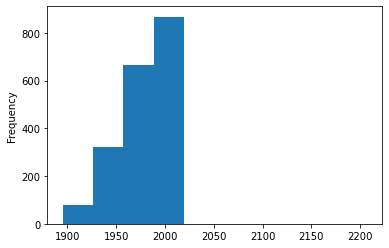

In [164]:
#for yr_blt, fill with yrsold+1 
#create new columns garage_age = yrsold - garage_yr_blt // for no garage , age = 0
#then drop garage_yr_blt column
train['garage_yr_blt'].plot(kind='hist')

In [165]:
train[train['garage_yr_blt'].isnull()][['garage_yr_blt','yr_sold']]

,garage_yr_blt,yr_sold
28,NaN,2007
53,NaN,2010
65,NaN,2007
79,NaN,2007
101,NaN,2007
...,...,...
1988,NaN,2010
2007,NaN,2006
2024,NaN,2006
2036,NaN,2007


In [166]:
train[train['garage_yr_blt']>train['yr_sold']][['garage_yr_blt','yr_sold']] #found this error

,garage_yr_blt,yr_sold
1697,2207.0,2007
1882,2008.0,2007


In [167]:
#set value to be 2007
train.at[1697,'garage_yr_blt'] = 2007
train.at[1882,'garage_yr_blt'] = 2007

In [168]:
train[train['garage_yr_blt']>train['yr_sold']][['garage_yr_blt','yr_sold']] #confirm that it's already fixed.

,garage_yr_blt,yr_sold


In [169]:
#fill with yrsold+1 
train['garage_yr_blt']= train['garage_yr_blt'].fillna((train['yr_sold']))

In [170]:
train[train['garage_yr_blt']==train['yr_sold']+1][['garage_yr_blt','yr_sold']]

,garage_yr_blt,yr_sold


<AxesSubplot:>

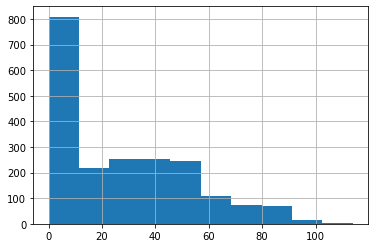

In [171]:
train['age_garage'] = train['yr_sold'] - train['garage_yr_blt']
train['age_garage'].hist()

In [172]:
train['age_garage'].value_counts()

0.0      218
1.0      134
2.0       60
4.0       59
5.0       54
        ... 
95.0       1
91.0       1
109.0      1
99.0       1
113.0      1
Name: age_garage, Length: 103, dtype: int64

In [173]:
#drop age_garace
train.drop(columns='garage_yr_blt',inplace=True)

In [174]:
#Check for error
test[test['garage_yr_blt']>test['yr_sold']][['garage_yr_blt','yr_sold']]

,garage_yr_blt,yr_sold


In [175]:
#same for test data
test['garage_yr_blt']= test['garage_yr_blt'].fillna((test['yr_sold']))
test['age_garage'] = test['yr_sold'] - test['garage_yr_blt']
test.drop(columns='garage_yr_blt',inplace=True)

In [176]:
train.isnull().sum()[train.isnull().sum()>0]

pool_qc         2040
fence           1649
misc_feature    1983
dtype: int64

In [177]:
test.isnull().sum()[test.isnull().sum()>0]

electrical        1
pool_qc         875
fence           707
misc_feature    838
dtype: int64

**pool_qc/fence/misc**

In [178]:
fill_na_test_train(['pool_qc','fence','misc_feature'])

In [179]:
train.isnull().sum()[train.isnull().sum()>0]

Series([], dtype: int64)

In [180]:
test.isnull().sum()[test.isnull().sum()>0]

electrical    1
dtype: int64

**for electical in test_data**

In [181]:
train['electrical'].value_counts()

SBrkr    1865
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: electrical, dtype: int64

In [182]:
test['electrical'].value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: electrical, dtype: int64

In [183]:
test['electrical'] = test['electrical'].fillna('None')

**Drop ID/PID columns since it has no values**

In [184]:
train.drop(columns=['id','pid'],inplace=True)
test.drop(columns=['pid'],inplace=True)

## 2. EDA

In [185]:
#Create correlation matrix
corr = train.corr()
corr.shape

(37, 37)

In [186]:
corr_sale = corr['saleprice'].sort_values()
corr_sale

age_garage        -0.444490
enclosed_porch    -0.135338
kitchen_abvgr     -0.125461
overall_cond      -0.097566
ms_subclass       -0.086982
bsmt_half_bath    -0.045288
low_qual_fin_sf   -0.041597
yr_sold           -0.015360
misc_val          -0.007372
bsmtfin_sf_2       0.016451
pool_area          0.025820
mo_sold            0.031683
3ssn_porch         0.048747
screen_porch       0.134631
bedroom_abvgr      0.136701
bsmt_unf_sf        0.191158
2nd_flr_sf         0.249497
half_bath          0.283544
bsmt_full_bath     0.283982
lot_area           0.301923
wood_deck_sf       0.327210
open_porch_sf      0.335339
lot_frontage       0.345965
bsmtfin_sf_1       0.439351
fireplaces         0.473064
totrms_abvgrd      0.505837
mas_vnr_area       0.506371
full_bath          0.538268
year_remod/add     0.550753
year_built         0.572548
1st_flr_sf         0.632030
garage_cars        0.648281
total_bsmt_sf      0.651807
garage_area        0.653962
gr_liv_area        0.710253
overall_qual       0

In [187]:
#filter for aba
corr_sale[np.abs(corr_sale)>0.4]

age_garage       -0.444490
bsmtfin_sf_1      0.439351
fireplaces        0.473064
totrms_abvgrd     0.505837
mas_vnr_area      0.506371
full_bath         0.538268
year_remod/add    0.550753
year_built        0.572548
1st_flr_sf        0.632030
garage_cars       0.648281
total_bsmt_sf     0.651807
garage_area       0.653962
gr_liv_area       0.710253
overall_qual      0.801996
saleprice         1.000000
Name: saleprice, dtype: float64

In [188]:
pairplot_col = [col for col in corr_sale[np.abs(corr_sale)>0.4].index if col!='saleprice']
pairplot_col

['age_garage',
 'bsmtfin_sf_1',
 'fireplaces',
 'totrms_abvgrd',
 'mas_vnr_area',
 'full_bath',
 'year_remod/add',
 'year_built',
 '1st_flr_sf',
 'garage_cars',
 'total_bsmt_sf',
 'garage_area',
 'gr_liv_area',
 'overall_qual']

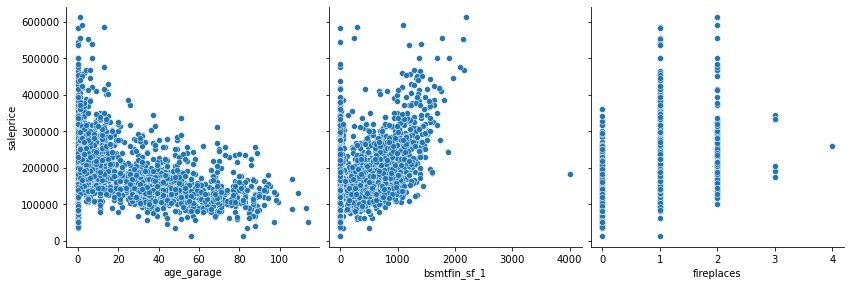

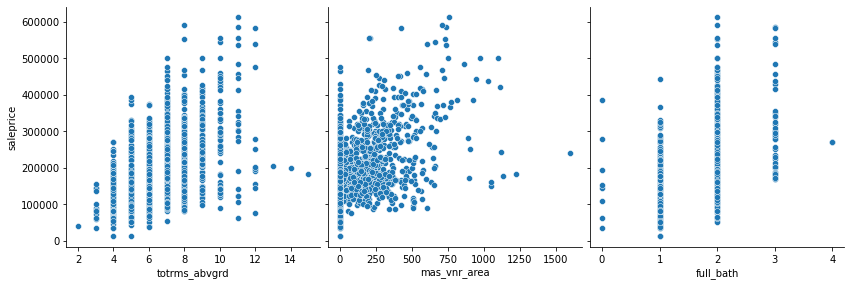

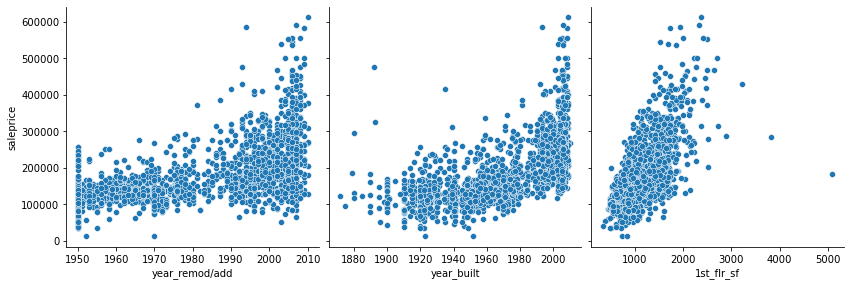

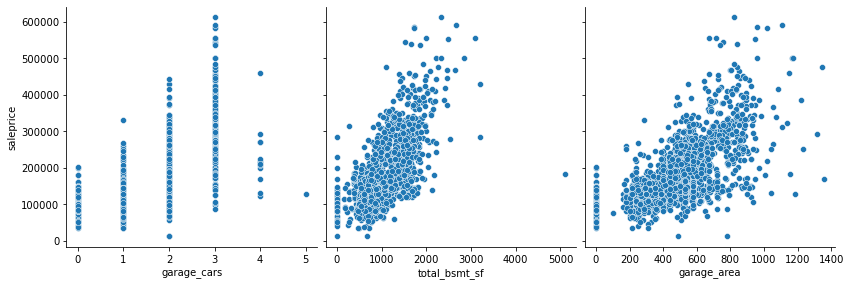

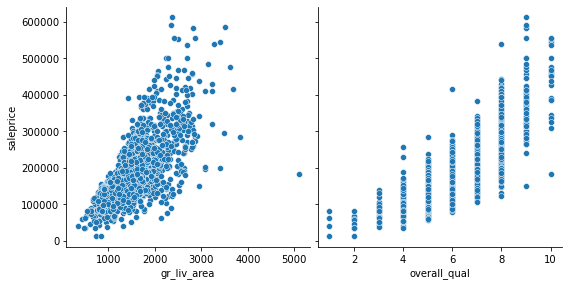

In [189]:
#pairplot
for i in range(0,len(pairplot_col),3):
    sns.pairplot(data=train,y_vars=['saleprice'],x_vars=pairplot_col[i:i+3],diag_kind=None,height=4)

Found Outlier in gr_liv_area, bsmtfin_sf_1, 1st_flt_sf

In [190]:
train[train['gr_liv_area'] > 4000]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_garage
1882,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,Inside,...,0,None,None,Elev,17000,10,2007,New,183850,0.0


filter out this row

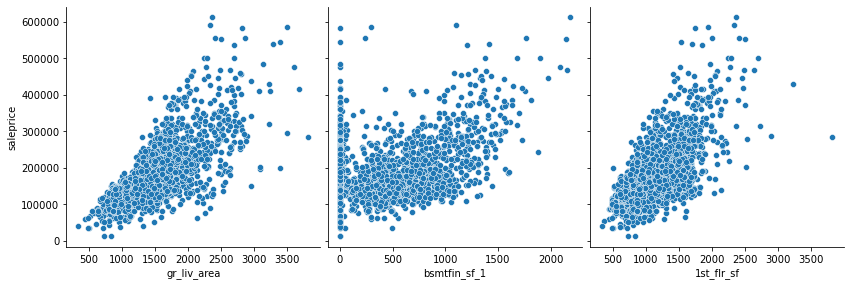

In [191]:
train = train[train['gr_liv_area'] < 4000]
sns.pairplot(data=train,y_vars=['saleprice'],x_vars=['gr_liv_area','bsmtfin_sf_1', '1st_flr_sf'],diag_kind=None,height=4)

In [192]:
train[train['1st_flr_sf'] > 4000]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_garage


Outlier from these 3 columns is the same row!!

<AxesSubplot:xlabel='overall_cond', ylabel='saleprice'>

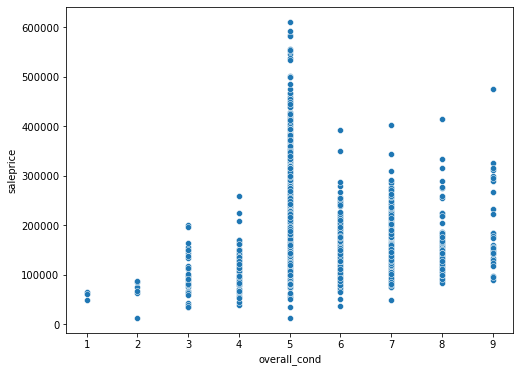

In [193]:
#overall qulity has good correlation, let's look at overall condition
plt.figure(figsize=(8,6))
sns.scatterplot(data=train,x='overall_cond',y='saleprice')

Many data point is in 5, make correlation low.

All of features mentioned above show correlation and maybe need to incorporate in the model late.

In [194]:
categorical_columns = [col for col in train.select_dtypes('object').columns]
numerical_columns = [col for col in train.columns if col not in categorical_columns]

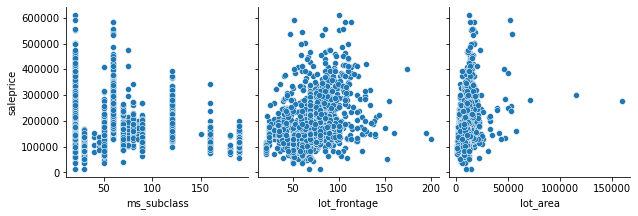

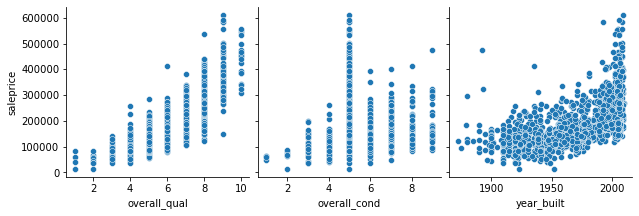

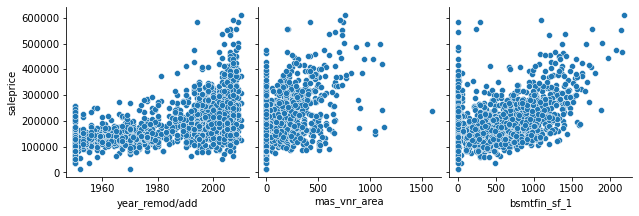

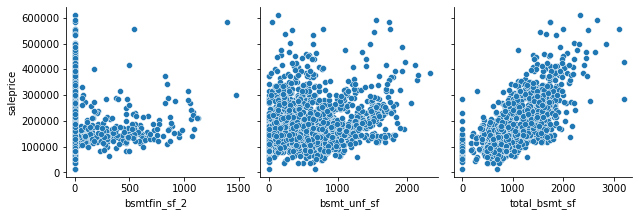

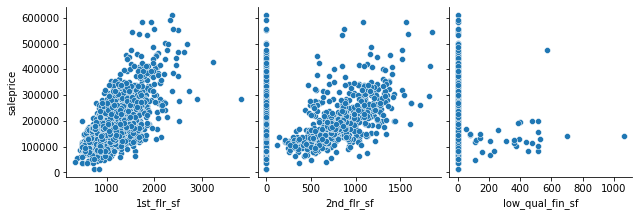

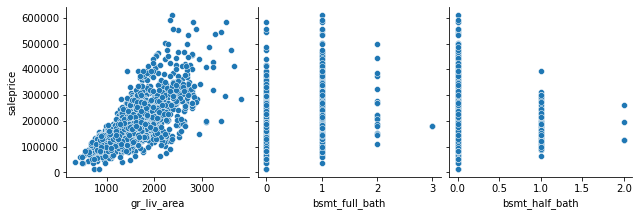

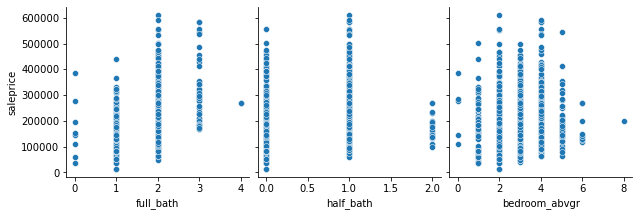

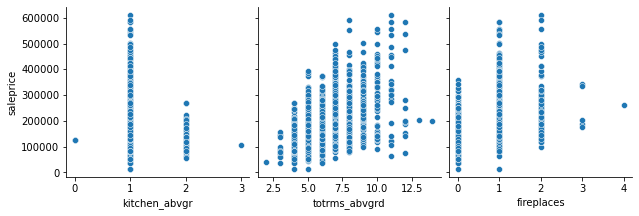

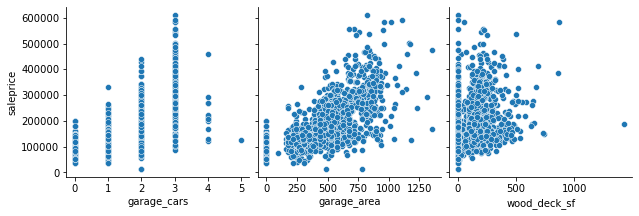

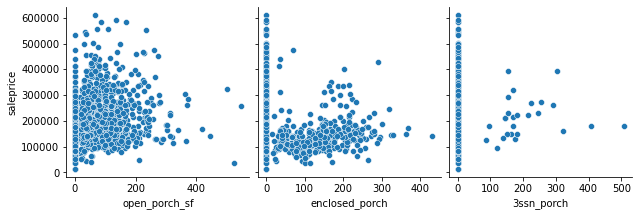

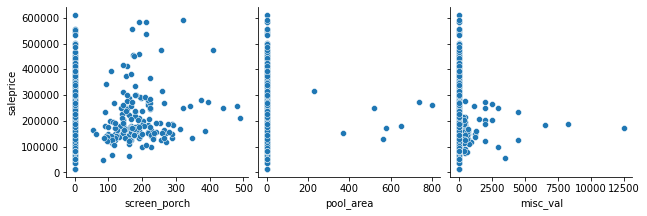

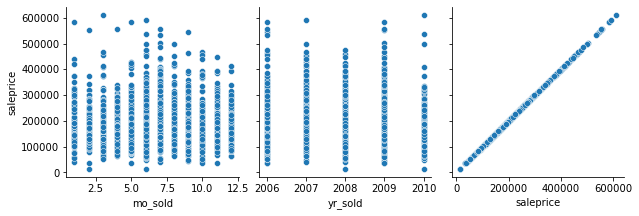

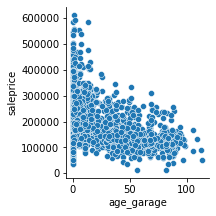

In [195]:
for i in range(0,len(numerical_columns),3):
    sns.pairplot(data=train,y_vars=['saleprice'],x_vars=numerical_columns[i:i+3],diag_kind=None,height=3)

In [196]:
train[train['lot_area']>100000] # drop these 2 columns

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_garage
471,50,RL,69.0552,159000,Pave,None,IR2,Low,AllPub,CulDSac,...,0,None,None,Shed,500,6,2007,WD,277000,49.0
694,20,RL,69.0552,115149,Pave,None,IR2,Low,AllPub,CulDSac,...,0,None,None,None,0,6,2007,WD,302000,36.0


In [197]:
#Filter outlier out
train = train[train['lot_area']<100000]

In [198]:
#Reset Index
train.reset_index(inplace=True,drop=True)

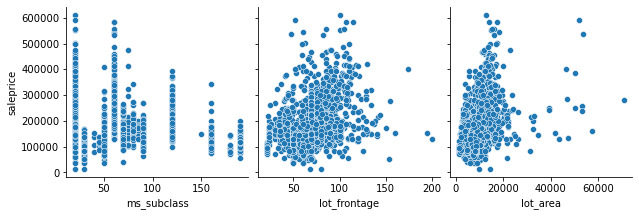

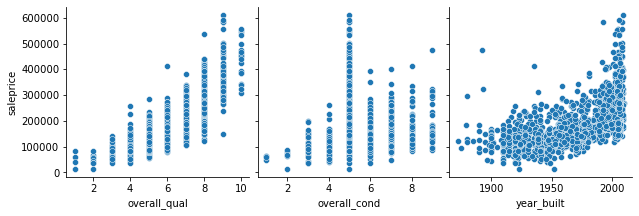

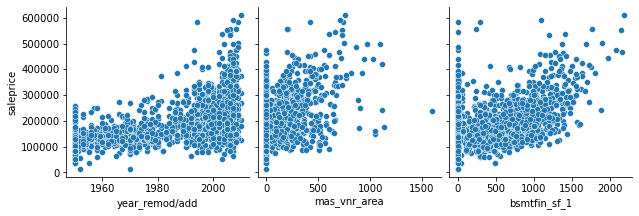

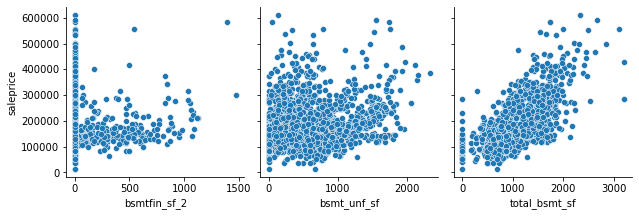

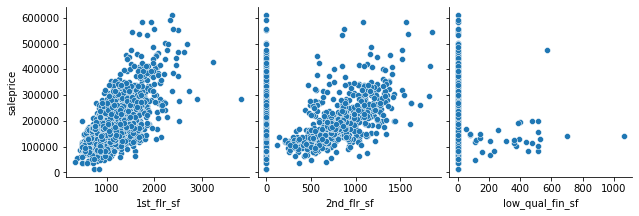

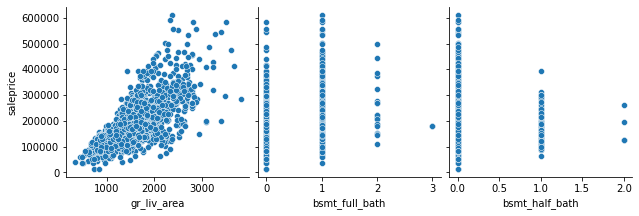

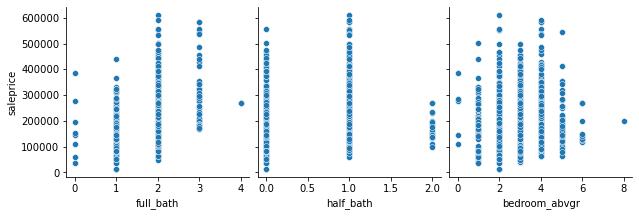

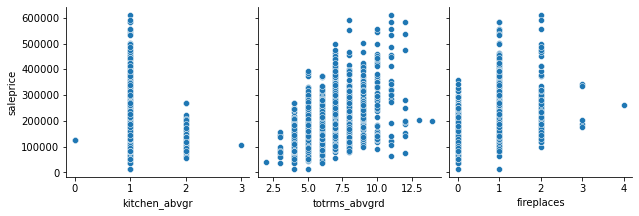

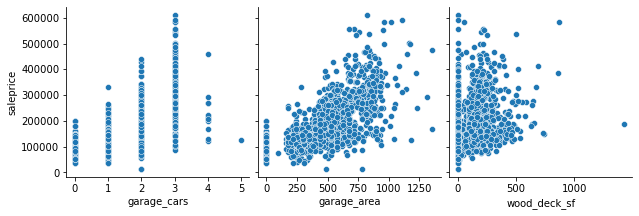

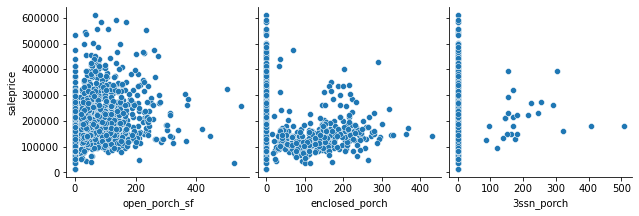

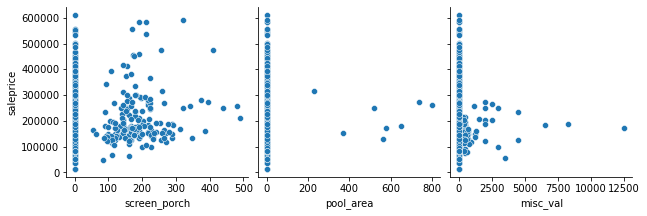

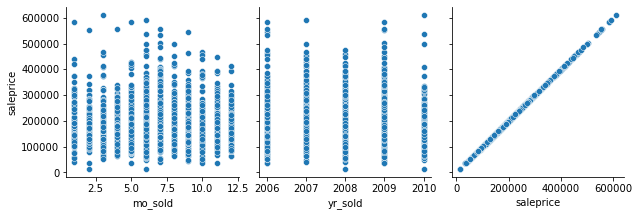

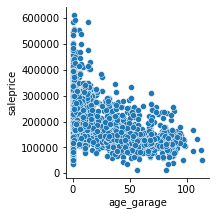

In [199]:
#
for i in range(0,len(numerical_columns),3):
    sns.pairplot(data=train,y_vars=['saleprice'],x_vars=numerical_columns[i:i+3],diag_kind=None,height=3)

** now look at categorical data**

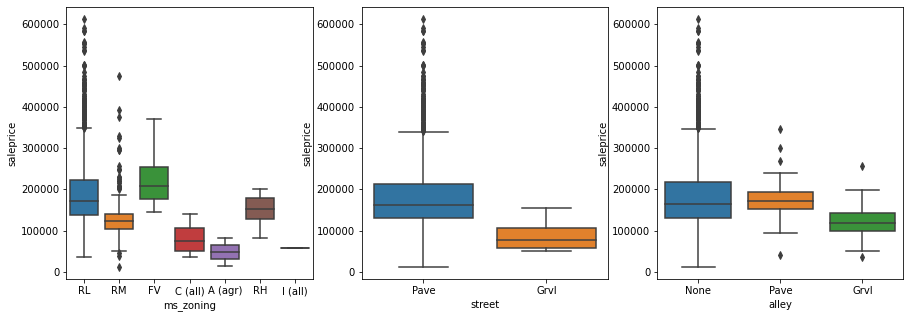

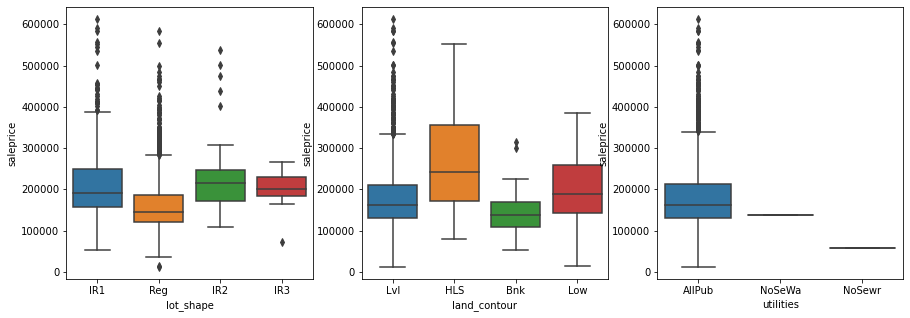

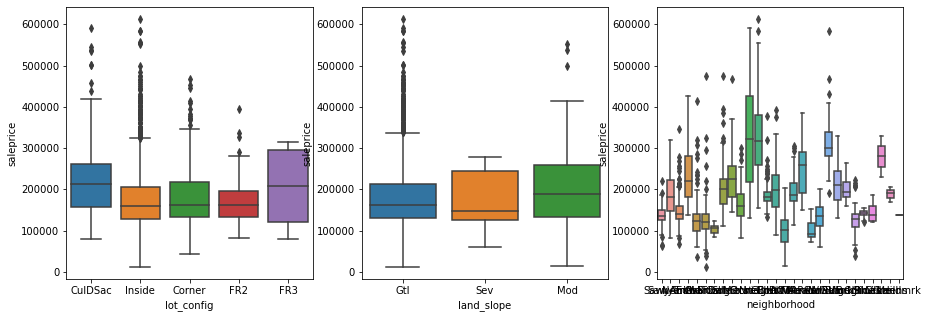

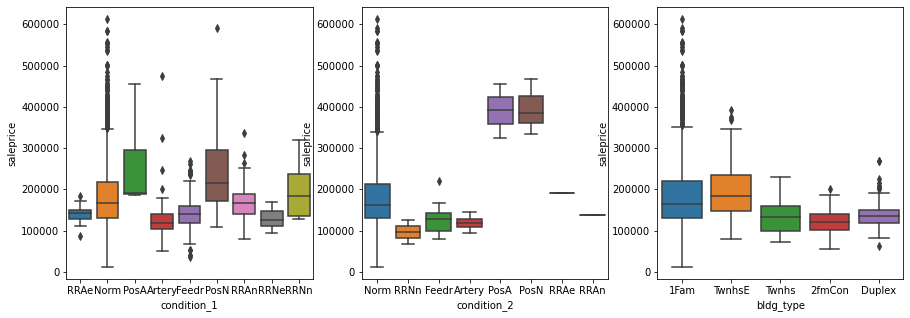

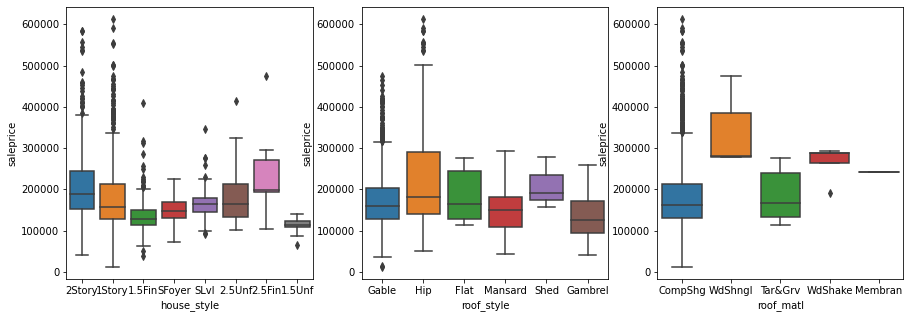

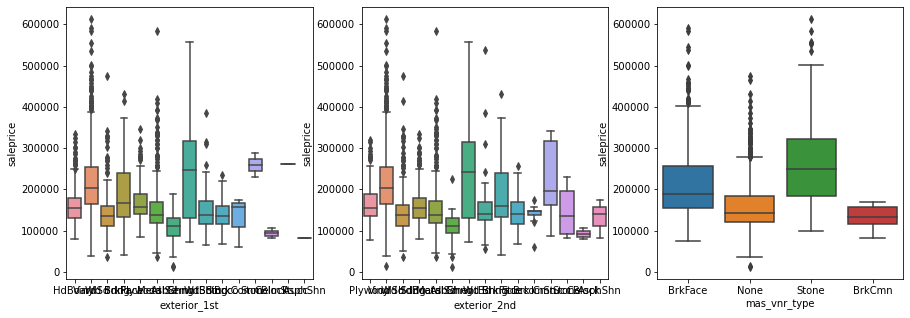

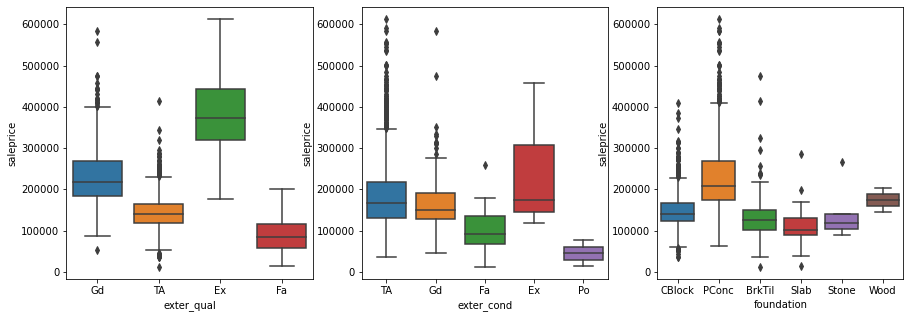

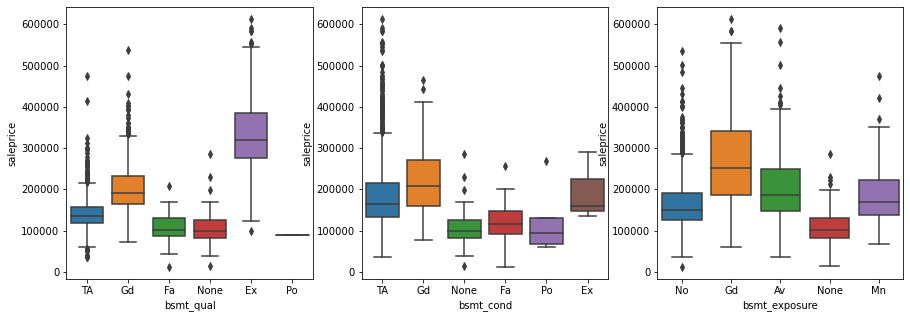

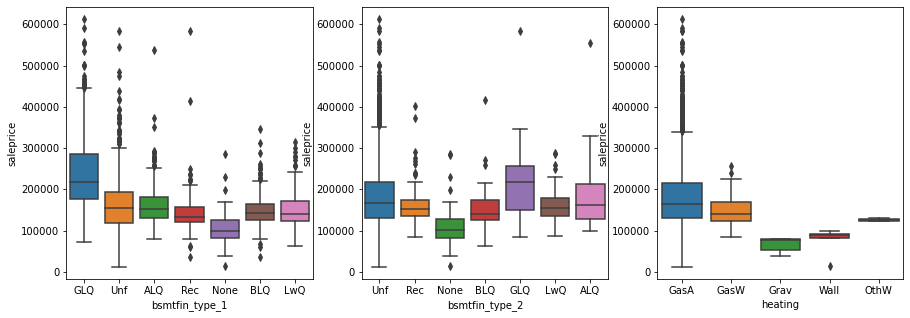

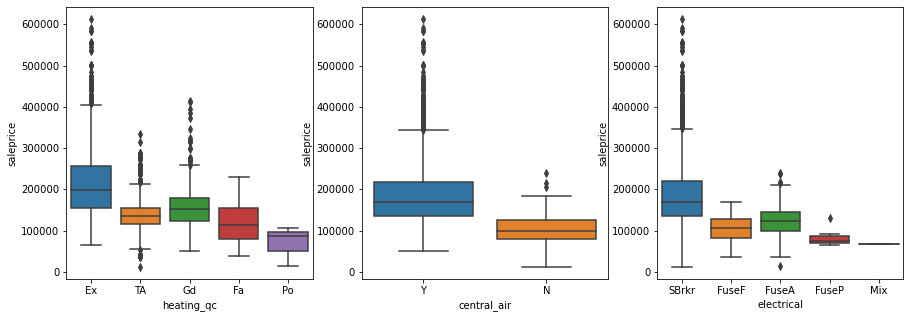

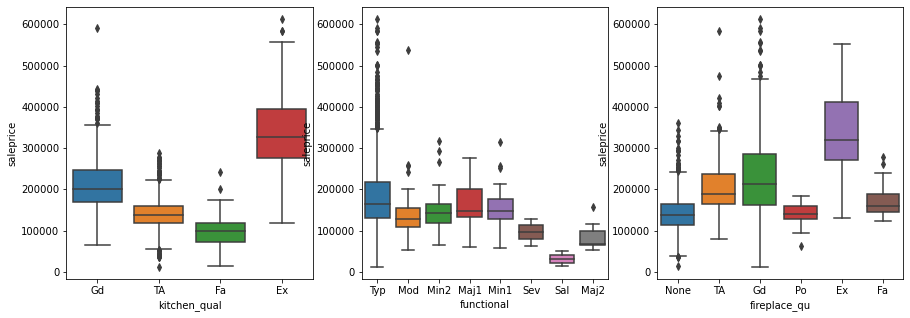

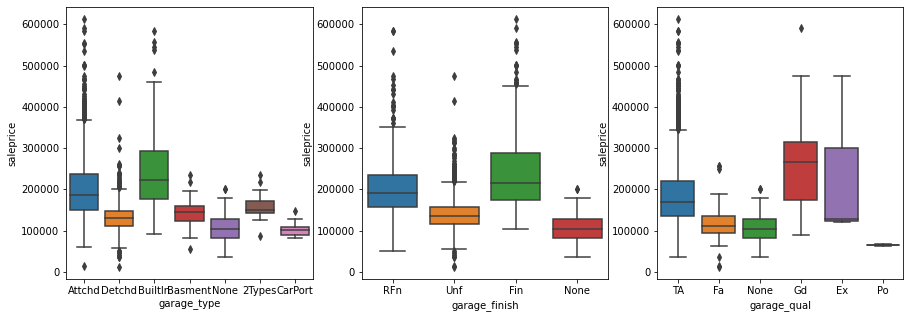

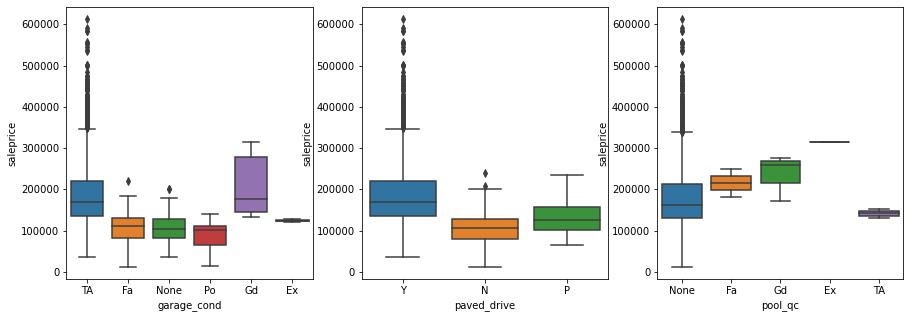

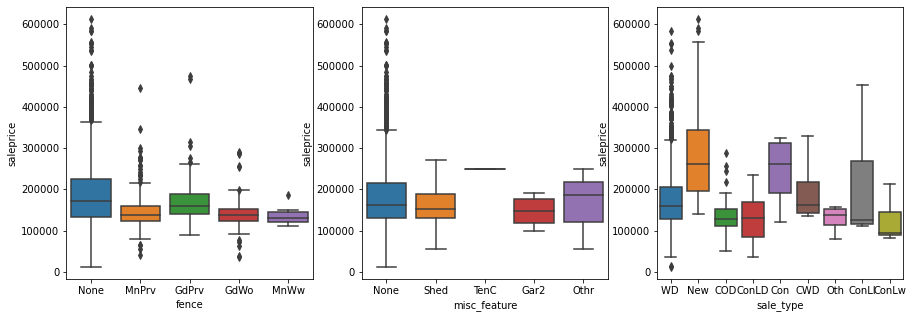

In [200]:
for i in range(0,len(categorical_columns),3):
    fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
    sns.boxplot(data=train,y='saleprice',x=categorical_columns[i],ax=ax1)
    sns.boxplot(data=train,y='saleprice',x=categorical_columns[i+1],ax=ax2)
    sns.boxplot(data=train,y='saleprice',x=categorical_columns[i+2],ax=ax3)

Most feature show clear correlation with saleprice such as '
**'ms_zoning',
'street',
'alley',
'lot_shape',
'land_contour',
'utilities',
'neighborhood',
'bldg_type',
'mas_vnr_type',
'roof_mati',
'exter_qual',
'exter_cond',
'heating',
'heating_qc',
'central_air',
'electrical',
'kitchen_qual',
'pool_qc',
'garage_qaul',
'fireplace_qu'**

## 3. Pre-processing

In [201]:
# ms_subclass and mo_sold to categorical type
train['ms_subclass'] = train.ms_subclass.astype('str')
test['ms_subclass'] = test.ms_subclass.astype('str')
train['mo_sold'] = train.mo_sold.astype('str')
test['mo_sold'] = test.mo_sold.astype('str')

### Polynomial Features

In [202]:
#look at high correlation columns with sale price, plot heatmap
corr_threshold = train.corr()[(np.abs(train.corr()['saleprice']) > 0.5)]['saleprice']
corr_threshold

overall_qual      0.803819
year_built        0.573575
year_remod/add    0.550429
mas_vnr_area      0.510505
total_bsmt_sf     0.665280
1st_flr_sf        0.647755
gr_liv_area       0.719374
full_bath         0.537959
totrms_abvgrd     0.510611
garage_cars       0.648897
garage_area       0.655706
saleprice         1.000000
Name: saleprice, dtype: float64

In [203]:
corr = train[corr_threshold.index].corr()
corr

,overall_qual,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,garage_cars,garage_area,saleprice
overall_qual,1.000000,0.602512,0.584491,0.424165,0.553591,0.474608,0.565435,0.515377,0.375430,0.587399,0.559706,0.803819
year_built,0.602512,1.000000,0.630606,0.320159,0.421203,0.328176,0.259119,0.481303,0.134359,0.542371,0.486767,0.573575
year_remod/add,0.584491,0.630606,1.000000,0.200612,0.315214,0.243156,0.322308,0.470417,0.199256,0.441209,0.397917,0.550429
mas_vnr_area,0.424165,0.320159,0.200612,1.000000,0.376736,0.358560,0.360399,0.231515,0.254982,0.356420,0.370169,0.510505
total_bsmt_sf,0.553591,0.421203,0.315214,0.376736,1.000000,0.792567,0.410756,0.336445,0.269529,0.448619,0.479429,0.665280
1st_flr_sf,0.474608,0.328176,0.243156,0.358560,0.792567,1.000000,0.529810,0.376866,0.371232,0.450548,0.489703,0.647755
gr_liv_area,0.565435,0.259119,0.322308,0.360399,0.410756,0.529810,1.000000,0.629999,0.812903,0.494865,0.480201,0.719374
full_bath,0.515377,0.481303,0.470417,0.231515,0.336445,0.376866,0.629999,1.000000,0.522345,0.467117,0.398346,0.537959
totrms_abvgrd,0.375430,0.134359,0.199256,0.254982,0.269529,0.371232,0.812903,0.522345,1.000000,0.367535,0.331844,0.510611
garage_cars,0.587399,0.542371,0.441209,0.356420,0.448619,0.450548,0.494865,0.467117,0.367535,1.000000,0.897346,0.648897


<AxesSubplot:>

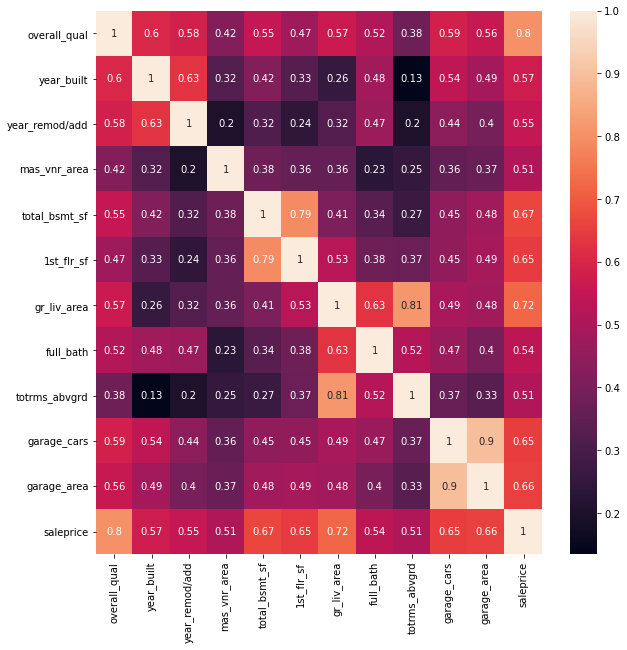

In [204]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

All of this columns has low correlation to saleprice and also low correlation with each other. I will try to do polynomial features

In [205]:
#create polynomial columns deg =2, interaction only
poly_columns = [col for col in corr.columns if col !='saleprice']
# this two columns will be used as 'categorical column later'
poly_columns

['overall_qual',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'total_bsmt_sf',
 '1st_flr_sf',
 'gr_liv_area',
 'full_bath',
 'totrms_abvgrd',
 'garage_cars',
 'garage_area']

In [206]:
len(poly_columns)

11

In [207]:
#Instantiate PolynomialFeatures + create train_poly_df
poly = PolynomialFeatures(include_bias=False,degree=2,interaction_only=True)
train_poly = poly.fit_transform(train[poly_columns])
train_poly_df = pd.DataFrame(train_poly,columns=poly.get_feature_names(poly_columns))
train_poly_df.head()

,overall_qual,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,garage_cars,...,gr_liv_area full_bath,gr_liv_area totrms_abvgrd,gr_liv_area garage_cars,gr_liv_area garage_area,full_bath totrms_abvgrd,full_bath garage_cars,full_bath garage_area,totrms_abvgrd garage_cars,totrms_abvgrd garage_area,garage_cars garage_area
0,6.0,1976.0,2005.0,289.0,725.0,725.0,1479.0,2.0,6.0,2.0,...,2958.0,8874.0,2958.0,702525.0,12.0,4.0,950.0,12.0,2850.0,950.0
1,7.0,1996.0,1997.0,132.0,913.0,913.0,2122.0,2.0,8.0,2.0,...,4244.0,16976.0,4244.0,1186198.0,16.0,4.0,1118.0,16.0,4472.0,1118.0
2,5.0,1953.0,2007.0,0.0,1057.0,1057.0,1057.0,1.0,5.0,1.0,...,1057.0,5285.0,1057.0,260022.0,5.0,1.0,246.0,5.0,1230.0,246.0
3,5.0,2006.0,2007.0,0.0,384.0,744.0,1444.0,2.0,7.0,2.0,...,2888.0,10108.0,2888.0,577600.0,14.0,4.0,800.0,14.0,2800.0,800.0
4,6.0,1900.0,1993.0,0.0,676.0,831.0,1445.0,2.0,6.0,2.0,...,2890.0,8670.0,2890.0,699380.0,12.0,4.0,968.0,12.0,2904.0,968.0


In [208]:
train

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_garage
0,60,RL,69.0552,13517,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,None,None,None,0,3,2010,WD,130500,34.0
1,60,RL,43.0000,11492,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,None,None,None,0,4,2009,WD,220000,12.0
2,20,RL,68.0000,7922,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,1,2010,WD,109000,57.0
3,60,RL,73.0000,9802,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,4,2010,WD,174000,3.0
4,50,RL,82.0000,14235,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,3,2010,WD,138500,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,20,RL,79.0000,11449,Pave,None,IR1,HLS,AllPub,Inside,...,0,None,None,None,0,1,2008,WD,298751,1.0
2041,30,RL,69.0552,12342,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,3,2009,WD,82500,48.0
2042,50,RL,57.0000,7558,Pave,None,Reg,Bnk,AllPub,Inside,...,0,None,None,None,0,3,2009,WD,177000,80.0
2043,20,RL,80.0000,10400,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,None,None,0,11,2009,WD,144000,53.0


In [209]:
#combine this to original data frame
#for col in train_poly_df.columns:
#    if col not in poly_columns:
#        train[col] = train_poly_df[col]
train.shape #original columns is   79 + 91 - 13 = 157

(2045, 79)

In [210]:
#Repeat the same for test data
poly = PolynomialFeatures(include_bias=False,degree=2,interaction_only=True)
test_poly = poly.fit_transform(test[poly_columns])
test_poly_df = pd.DataFrame(test_poly,columns=poly.get_feature_names(poly_columns))
test_poly_df

,overall_qual,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,garage_cars,...,gr_liv_area full_bath,gr_liv_area totrms_abvgrd,gr_liv_area garage_cars,gr_liv_area garage_area,full_bath totrms_abvgrd,full_bath garage_cars,full_bath garage_area,totrms_abvgrd garage_cars,totrms_abvgrd garage_area,garage_cars garage_area
0,6.0,1910.0,1950.0,0.0,1020.0,908.0,1928.0,2.0,9.0,1.0,...,3856.0,17352.0,1928.0,848320.0,18.0,2.0,880.0,9.0,3960.0,440.0
1,5.0,1977.0,1977.0,0.0,1967.0,1967.0,1967.0,2.0,10.0,2.0,...,3934.0,19670.0,3934.0,1140860.0,20.0,4.0,1160.0,20.0,5800.0,1160.0
2,7.0,2006.0,2006.0,0.0,654.0,664.0,1496.0,2.0,7.0,2.0,...,2992.0,10472.0,2992.0,637296.0,14.0,4.0,852.0,14.0,2982.0,852.0
3,5.0,1923.0,2006.0,0.0,968.0,968.0,968.0,1.0,5.0,2.0,...,968.0,4840.0,1936.0,464640.0,5.0,2.0,480.0,10.0,2400.0,960.0
4,6.0,1963.0,1963.0,247.0,1394.0,1394.0,1394.0,1.0,6.0,2.0,...,1394.0,8364.0,2788.0,716516.0,6.0,2.0,514.0,12.0,3084.0,1028.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,6.0,1974.0,1974.0,0.0,1084.0,1084.0,1877.0,2.0,8.0,2.0,...,3754.0,15016.0,3754.0,915976.0,16.0,4.0,976.0,16.0,3904.0,976.0
875,6.0,1966.0,1999.0,410.0,1104.0,1104.0,1988.0,2.0,9.0,2.0,...,3976.0,17892.0,3976.0,954240.0,18.0,4.0,960.0,18.0,4320.0,960.0
876,5.0,1968.0,1968.0,0.0,952.0,1211.0,1211.0,1.0,5.0,1.0,...,1211.0,6055.0,1211.0,389942.0,5.0,1.0,322.0,5.0,1610.0,322.0
877,4.0,1971.0,1971.0,0.0,864.0,864.0,864.0,1.0,5.0,2.0,...,864.0,4320.0,1728.0,456192.0,5.0,2.0,528.0,10.0,2640.0,1056.0


In [211]:
#for col in test_poly_df.columns:
 #   if col not in poly_columns:
 #       test[col] = test_poly_df[col]
test.shape

(879, 79)

###  StandardScaler()

Doing StandardScaler now because I don't want to standardize dummies column

In [212]:
train.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_garage
0,60,RL,69.0552,13517,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,None,None,None,0,3,2010,WD,130500,34.0
1,60,RL,43.0000,11492,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,None,None,None,0,4,2009,WD,220000,12.0
2,20,RL,68.0000,7922,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,1,2010,WD,109000,57.0
3,60,RL,73.0000,9802,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,4,2010,WD,174000,3.0
4,50,RL,82.0000,14235,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,3,2010,WD,138500,53.0


In [213]:
categorical_columns = [col for col in train.select_dtypes('object').columns]
numerical_columns = [col for col in train.columns if (col not in categorical_columns) & (col!='saleprice')]

In [214]:
train_numeric = train[numerical_columns]
train_numeric

,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,...,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,yr_sold,age_garage
0,69.0552,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,...,475.0,0,44,0,0,0,0,0,2010,34.0
1,43.0000,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,...,559.0,0,74,0,0,0,0,0,2009,12.0
2,68.0000,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,...,246.0,0,52,0,0,0,0,0,2010,57.0
3,73.0000,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,...,400.0,100,0,0,0,0,0,0,2010,3.0
4,82.0000,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,...,484.0,0,59,0,0,0,0,0,2010,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,79.0000,11449,8,5,2007,2007,0.0,1011.0,0.0,873.0,...,520.0,0,276,0,0,0,0,0,2008,1.0
2041,69.0552,12342,4,5,1940,1950,0.0,262.0,0.0,599.0,...,539.0,158,0,0,0,0,0,0,2009,48.0
2042,57.0000,7558,6,6,1928,1950,0.0,0.0,0.0,896.0,...,342.0,0,0,0,0,0,0,0,2009,80.0
2043,80.0000,10400,4,5,1956,1956,0.0,155.0,750.0,295.0,...,294.0,0,189,140,0,0,0,0,2009,53.0


In [1840]:
train_numeric.isnull().sum()>0

lot_frontage                 False
lot_area                     False
overall_qual                 False
overall_cond                 False
year_built                   False
                             ...  
full_bath garage_cars        False
full_bath garage_area        False
totrms_abvgrd garage_cars    False
totrms_abvgrd garage_area    False
garage_cars garage_area      False
Length: 89, dtype: bool

In [215]:
test_numeric = test[numerical_columns]
test_numeric

,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,...,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,yr_sold,age_garage
0,69.0000,9142,6,8,1910,1950,0.0,0,0,1020,...,440,0,60,112,0,0,0,0,2006,96.0
1,69.0552,9662,5,4,1977,1977,0.0,0,0,1967,...,580,170,0,0,0,0,0,0,2006,29.0
2,58.0000,17104,7,5,2006,2006,0.0,554,0,100,...,426,100,24,0,0,0,0,0,2006,0.0
3,60.0000,8520,5,6,1923,2006,0.0,0,0,968,...,480,0,0,184,0,0,0,0,2007,72.0
4,69.0552,9500,6,5,1963,1963,247.0,609,0,785,...,514,0,76,0,0,185,0,0,2009,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,80.0000,8000,6,6,1974,1974,0.0,931,153,0,...,488,0,96,0,0,0,0,0,2007,33.0
875,90.0000,14670,6,7,1966,1999,410.0,575,0,529,...,480,0,230,0,0,0,0,0,2008,42.0
876,55.0000,8250,5,5,1968,1968,0.0,250,492,210,...,322,0,63,0,0,0,0,0,2008,40.0
877,60.0000,9000,4,6,1971,1971,0.0,616,0,248,...,528,0,0,0,0,0,0,0,2007,33.0


In [216]:
#instantiate scaling object
ss = StandardScaler()
train_numeric_ss = ss.fit_transform(train_numeric)
test_numeric_ss = ss.transform(test_numeric)

In [217]:
train_numeric_ss_df = pd.DataFrame(train_numeric_ss,columns=train_numeric.columns)
test_numeric_ss_df = pd.DataFrame(test_numeric_ss,columns=test_numeric.columns)
test_numeric_ss_df.head()

,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,...,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,yr_sold,age_garage
0,0.010209,-0.143569,-0.075980,2.207546,-2.045303,-1.622829,-0.567853,-0.994240,-0.291115,1.016142,...,-0.152779,-0.729709,0.193602,1.497051,-0.102891,-0.288313,-0.059745,-0.09931,-1.353248,2.720637
1,0.012987,-0.044065,-0.779048,-1.413414,0.175330,-0.338968,-0.567853,-0.994240,-0.291115,3.143001,...,0.499852,0.597510,-0.717145,-0.377075,-0.102891,-0.288313,-0.059745,-0.09931,-1.353248,0.056923
2,-0.543311,1.379997,0.627089,-0.508174,1.136499,1.039993,-0.567853,0.265476,-0.291115,-1.050077,...,-0.218042,0.051008,-0.352846,-0.377075,-0.102891,-0.288313,-0.059745,-0.09931,-1.353248,-1.096027
3,-0.442671,-0.262592,-0.779048,0.397066,-1.614434,1.039993,-0.567853,-0.994240,-0.291115,0.899356,...,0.033687,-0.729709,-0.717145,2.701846,-0.102891,-0.288313,-0.059745,-0.09931,-0.591720,1.766471
4,0.012987,-0.075064,-0.075980,-0.508174,-0.288683,-1.004673,0.870329,0.390538,-0.291115,0.488358,...,0.192183,-0.729709,0.436468,-0.377075,-0.102891,2.932590,-0.059745,-0.09931,0.931336,0.732791


In [218]:
train_numeric_ss_df.isnull().sum()[train_numeric_ss_df.isnull().sum()>0]

Series([], dtype: int64)

### Get_dummies()

In [219]:
train_categorical = train[categorical_columns]
test_categorical = test[categorical_columns]
train_categorical.head()

,ms_subclass,ms_zoning,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,...,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,mo_sold,sale_type
0,60,RL,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,...,Attchd,RFn,TA,TA,Y,None,None,None,3,WD
1,60,RL,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,...,Attchd,RFn,TA,TA,Y,None,None,None,4,WD
2,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Detchd,Unf,TA,TA,Y,None,None,None,1,WD
3,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,...,BuiltIn,Fin,TA,TA,Y,None,None,None,4,WD
4,50,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,...,Detchd,Unf,TA,TA,N,None,None,None,3,WD


In [220]:
train_categorical = pd.get_dummies(train_categorical,drop_first=True)
test_categorical= pd.get_dummies(test_categorical,drop_first=True)
train_categorical.head()

,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,...,mo_sold_8,mo_sold_9,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [221]:
test_categorical.head()

,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,...,mo_sold_9,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [222]:
col_to_add = [col for col in train_categorical.columns if (col not in test_categorical.columns)]
len(col_to_add)

26

In [223]:
col_to_add  # These are the columns that are in train data
            # if these are selected as features, when apply to test data it will generate error

['ms_subclass_150',
 'ms_zoning_C (all)',
 'utilities_NoSeWa',
 'neighborhood_GrnHill',
 'neighborhood_Landmrk',
 'condition_2_Feedr',
 'condition_2_RRAe',
 'condition_2_RRAn',
 'condition_2_RRNn',
 'roof_matl_Membran',
 'exterior_1st_CBlock',
 'exterior_1st_ImStucc',
 'exterior_1st_Stone',
 'exterior_2nd_Stone',
 'bsmt_cond_Fa',
 'bsmt_cond_Po',
 'heating_OthW',
 'heating_Wall',
 'heating_qc_Po',
 'electrical_Mix',
 'functional_Sal',
 'functional_Sev',
 'garage_qual_Fa',
 'pool_qc_Fa',
 'pool_qc_Gd',
 'misc_feature_TenC']

In [224]:
#create new columns in test data and assign values to be 0
for col in col_to_add:
    test_categorical[col] = 0
test_categorical.head()

,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,...,heating_OthW,heating_Wall,heating_qc_Po,electrical_Mix,functional_Sal,functional_Sev,garage_qual_Fa,pool_qc_Fa,pool_qc_Gd,misc_feature_TenC
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create new train and test dataframe which combine everything

In [225]:
print(train[['saleprice']].shape)
print(train_numeric_ss_df.shape)
print(train_categorical.shape)
train_data = pd.concat([train[['saleprice']],train_numeric_ss_df,train_categorical],axis=1)
train_data.head()

(2045, 1)
(2045, 34)
(2045, 249)


,saleprice,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,mo_sold_8,mo_sold_9,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,130500,0.012987,0.693608,-0.075980,2.207546,0.142186,0.992443,1.114878,0.217725,-0.291115,...,0,0,0,0,0,0,0,0,0,1
1,220000,-1.298112,0.306115,0.627089,-0.508174,0.805061,0.612040,0.200730,0.454206,-0.291115,...,0,0,0,0,0,0,0,0,0,1
2,109000,-0.040111,-0.377022,-0.779048,1.302306,-0.620121,1.087544,-0.567853,0.667949,-0.291115,...,0,0,0,0,0,0,0,0,0,1
3,174000,0.211489,-0.017275,-0.779048,-0.508174,1.136499,1.087544,-0.567853,-0.994240,-0.291115,...,0,0,0,0,0,0,0,0,0,1
4,138500,0.664370,0.831001,-0.075980,2.207546,-2.376741,0.421838,-0.567853,-0.994240,-0.291115,...,0,0,0,0,0,0,0,0,0,1


In [226]:
print(test[['id']].shape)
print(test_numeric_ss_df.shape)
print(test_categorical.shape)
test_data = pd.concat([test[['id']],test_numeric_ss_df,test_categorical],axis=1)
test_data.head()

(879, 1)
(879, 34)
(879, 259)


,id,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,heating_OthW,heating_Wall,heating_qc_Po,electrical_Mix,functional_Sal,functional_Sev,garage_qual_Fa,pool_qc_Fa,pool_qc_Gd,misc_feature_TenC
0,2658,0.010209,-0.143569,-0.075980,2.207546,-2.045303,-1.622829,-0.567853,-0.994240,-0.291115,...,0,0,0,0,0,0,0,0,0,0
1,2718,0.012987,-0.044065,-0.779048,-1.413414,0.175330,-0.338968,-0.567853,-0.994240,-0.291115,...,0,0,0,0,0,0,0,0,0,0
2,2414,-0.543311,1.379997,0.627089,-0.508174,1.136499,1.039993,-0.567853,0.265476,-0.291115,...,0,0,0,0,0,0,0,0,0,0
3,1989,-0.442671,-0.262592,-0.779048,0.397066,-1.614434,1.039993,-0.567853,-0.994240,-0.291115,...,0,0,0,0,0,0,0,0,0,0
4,625,0.012987,-0.075064,-0.075980,-0.508174,-0.288683,-1.004673,0.870329,0.390538,-0.291115,...,0,0,0,0,0,0,0,0,0,0


## 0:Baseline model, saleprice_mean

In [227]:
#create submit dataframe, get ID from test and assign Saleprice as mean
submit = test_data[['id']].rename(columns={'id':'Id'})
submit['SalePrice'] = train_data['saleprice'].mean()
submit

,Id,SalePrice
0,2658,181358.728117
1,2718,181358.728117
2,2414,181358.728117
3,1989,181358.728117
4,625,181358.728117
...,...,...
874,1662,181358.728117
875,1234,181358.728117
876,1373,181358.728117
877,1672,181358.728117


In [228]:
#write submit to csv
submit.to_csv('../Model/0_baseline_model.csv',index=False)

## Write function for all model and report

In [229]:
def all_model_fit_report(feature):
    '''When users input the feature list, instantiate the following model
    
    1.LinearRegression 
    2.RidgeCV
    3.Ridge using alpha_ from RidgeCV
    4.LassoCV
    5.Lasso using alpha_ from LassoCV
    6.ElasticNetCV
    7.ElasticNet using alpha_ and l1_ratio_ from Elasticnet CV
    
    and print report and return name of best model based on RMSE of cross_val_score 
    '''
    # Create X,y
    X = train_data[feature]
    y = train_data['saleprice']
    
    # LinearRegression
    lr = LinearRegression()
    lr.fit(X,y)
    lr_score = lr.score(X,y)
    lr_rmse = np.sqrt(metrics.mean_squared_error(y,lr.predict(X)))
    lr_cv_score = cross_val_score(lr,X,y).mean()
    lr_cv_rmse = np.abs(cross_val_score(lr,X,y,scoring='neg_root_mean_squared_error')).mean()
    
    # RidgeCV
    ridgecv = RidgeCV(alphas=np.logspace(0,5,200))
    ridgecv.fit(X,y)
    # Ridge
    ridge = Ridge(alpha=ridgecv.alpha_)
    ridge.fit(X,y)
    ridge_score = ridge.score(X,y)
    ridge_rmse = np.sqrt(metrics.mean_squared_error(y,ridge.predict(X)))
    ridge_cv_score = cross_val_score(ridge,X,y).mean()
    ridge_cv_rmse = np.abs(cross_val_score(ridge,X,y,scoring='neg_root_mean_squared_error')).mean()
    
    #LassoCV
    lassocv = LassoCV(n_alphas=200,max_iter=1000000)
    lassocv.fit(X,y)
    #Lasso
    lasso = Lasso(alpha=lassocv.alpha_)
    lasso.fit(X,y)
    lasso_score = lasso.score(X,y)
    lasso_rmse = np.sqrt(metrics.mean_squared_error(y,lasso.predict(X)))
    lasso_cv_score = cross_val_score(lasso,X,y).mean()
    lasso_cv_rmse = np.abs(cross_val_score(lasso,X,y,scoring='neg_root_mean_squared_error')).mean()
    
    #ElasticNetCV
    encv = ElasticNetCV(n_alphas=100,l1_ratio=np.linspace(0.1,1,20),max_iter=1000000)
    encv.fit(X,y)
    encv_optimal_l1_ratio=encv.l1_ratio_
    #ElasticNet
    en = ElasticNet(alpha=encv.alpha_,l1_ratio=encv.l1_ratio_)
    en.fit(X,y)
    en_score = en.score(X,y)
    en_rmse = np.sqrt(metrics.mean_squared_error(y,en.predict(X)))
    elasticnet_cv_score = cross_val_score(en,X,y).mean()
    elasticnet_cv_rmse = np.abs(cross_val_score(en,X,y,scoring='neg_root_mean_squared_error')).mean()
    
    #Print Result
    print(f"""     
         LinearRegression
         R2 Score on training data: {round(lr_score,4)}
         RMSE on training data :{round(lr_rmse,4)}
         Estimated R2 Score on unseen data: {round(lr_cv_score,4)}
         Estimated RMSE on unseen data: {round(lr_cv_rmse,4)}

         Ridge
         R2 Score on training data: {round(ridge_score,4)}
         RMSE on training data :{round(ridge_rmse,4)}
         Estimated R2 Score on unseen data: {round(ridge_cv_score,4)}
         Estimated RMSE on unseen data: {round(ridge_cv_rmse,4)}

         Lasso
         R2 Score on training data: {round(lasso_score,4)}
         RMSE on training data :{round(lasso_rmse,4)}
         Estimated R2 Score on unseen data: {round(lasso_cv_score,4)}
         Estimated RMSE on unseen data: {round(lasso_cv_rmse,4)}   

         ElasticNet
         Opimal l1 ration: {encv_optimal_l1_ratio}
         R2 Score on training data: {round(en_score,4)}
         RMSE on test training :{round(en_rmse,4)}
         Estimated R2 Score on unseen data: {round(elasticnet_cv_score,4)}
         Estimated RMSE on unseen data: {round(elasticnet_cv_rmse,4)}         
        """)
    
    all_model = { "Model":['LinearRegression','Ridge','Lasso','ElasticNet'],
                 "cv_rmse":[lr_cv_rmse,ridge_cv_rmse,lasso_cv_rmse,elasticnet_cv_rmse],
                 "cv_score" :[lr_cv_score,ridge_cv_score,lasso_cv_score,elasticnet_cv_score]
                }
    pd.options.display.float_format = '{:.4f}'.format
    df = pd.DataFrame(all_model)
    best_model = df.sort_values('cv_rmse')['Model'].reset_index(drop=True)[0]
    return best_model

## 1: Subset selection using backward elimination

In [230]:
import statsmodels.api as sm

In [231]:
feature = [col for col in train_data.columns if col != 'saleprice']
len(feature)

283

In [232]:
cols = feature
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = train_data[cols]
    X_1 = sm.add_constant(X_1)
    y= train_data['saleprice']
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index=cols)
    pmax = max(p)
    features_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(features_with_p_max)
    else:
        break
features1 = cols
features1

['lot_area',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'total_bsmt_sf',
 '1st_flr_sf',
 '2nd_flr_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'totrms_abvgrd',
 'fireplaces',
 'garage_cars',
 'garage_area',
 'wood_deck_sf',
 'screen_porch',
 'pool_area',
 'ms_subclass_150',
 'ms_subclass_190',
 'ms_subclass_20',
 'ms_subclass_30',
 'ms_subclass_40',
 'ms_subclass_45',
 'ms_subclass_50',
 'ms_subclass_60',
 'ms_subclass_70',
 'ms_subclass_75',
 'ms_subclass_80',
 'ms_subclass_85',
 'ms_zoning_FV',
 'ms_zoning_RH',
 'ms_zoning_RL',
 'land_contour_HLS',
 'neighborhood_CollgCr',
 'neighborhood_Edwards',
 'neighborhood_Gilbert',
 'neighborhood_GrnHill',
 'neighborhood_Mitchel',
 'neighborhood_NAmes',
 'neighborhood_NWAmes',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'neighborhood_OldTown',
 'neighborhood_SWISU',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_StoneBr',
 'neigh

In [233]:
len(features1)

106

In [234]:
all_model_fit_report(features1)

     
         LinearRegression
         R2 Score on training data: 0.9403
         RMSE on training data :19360.0331
         Estimated R2 Score on unseen data: -1.0851182003800666e+22
         Estimated RMSE on unseen data: 4583661680015592.0

         Ridge
         R2 Score on training data: 0.9384
         RMSE on training data :19666.9708
         Estimated R2 Score on unseen data: 0.9267
         Estimated RMSE on unseen data: 21407.1245

         Lasso
         R2 Score on training data: 0.9324
         RMSE on training data :20610.6257
         Estimated R2 Score on unseen data: 0.9225
         Estimated RMSE on unseen data: 22018.3486   

         ElasticNet
         Opimal l1 ration: 1.0
         R2 Score on training data: 0.9324
         RMSE on test training :20610.6257
         Estimated R2 Score on unseen data: 0.9225
         Estimated RMSE on unseen data: 22018.3486         
        


'Ridge'

In [235]:
# Build lasso model
# Create X,y
X = train_data[features1]
y = train_data['saleprice']

In [236]:
#LassoCV
lassocv = LassoCV(n_alphas=200)
lassocv.fit(X,y)
#Lasso
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X,y)
lasso_score = lasso.score(X,y)
lasso_rmse = np.sqrt(metrics.mean_squared_error(y,lasso.predict(X)))
lasso_cv_score = cross_val_score(lasso,X,y).mean()
lasso_cv_rmse = np.abs(cross_val_score(lasso,X,y,scoring='neg_root_mean_squared_error')).mean()

In [237]:
lassocv.alpha_

63.716189862025175

In [238]:
lasso_cv_rmse

22018.34858972292

In [239]:
coef = pd.Series(lasso.coef_,index=features1)

In [240]:
#number of remaining columns
coef[coef!=0].count()

85

In [241]:
#number of eliminated columns
coef[coef==0].count()

21

In [242]:
coef[coef==0].index

Index(['ms_subclass_150', 'ms_subclass_190', 'ms_subclass_40', 'ms_zoning_RH',
       'neighborhood_SWISU', 'neighborhood_Sawyer', 'house_style_2.5Fin',
       'exterior_1st_BrkComm', 'heating_OthW', 'functional_Maj2',
       'functional_Mod', 'garage_qual_Po', 'garage_cond_Fa', 'garage_cond_Gd',
       'garage_cond_Po', 'garage_cond_TA', 'pool_qc_Fa', 'pool_qc_Gd',
       'pool_qc_None', 'misc_feature_TenC', 'sale_type_Con'],
      dtype='object')

In [243]:
coef.sort_values().head(10) #look at features that affect saleprice negatively

exter_qual_TA         -23881.5338
exter_qual_Gd         -20917.1146
kitchen_qual_Gd       -19026.2514
kitchen_qual_TA       -18791.2752
kitchen_qual_Fa       -18471.2514
bsmt_qual_Gd          -18114.8494
exter_qual_Fa         -15627.8492
bsmt_qual_TA          -13173.6324
bsmt_qual_Fa           -7439.3573
neighborhood_NWAmes    -6734.2529
dtype: float64

In [244]:
coef.sort_values().tail(10) #look at features that  affect saleprice postively

ms_subclass_30         12311.3966
overall_qual           12332.0244
sale_type_New          14314.9404
neighborhood_NridgHt   14546.7356
exterior_1st_BrkFace   16263.2227
functional_Typ         17877.6720
gr_liv_area            19212.5954
neighborhood_NoRidge   19730.0768
neighborhood_StoneBr   27955.7926
neighborhood_GrnHill   35720.0479
dtype: float64

<AxesSubplot:>

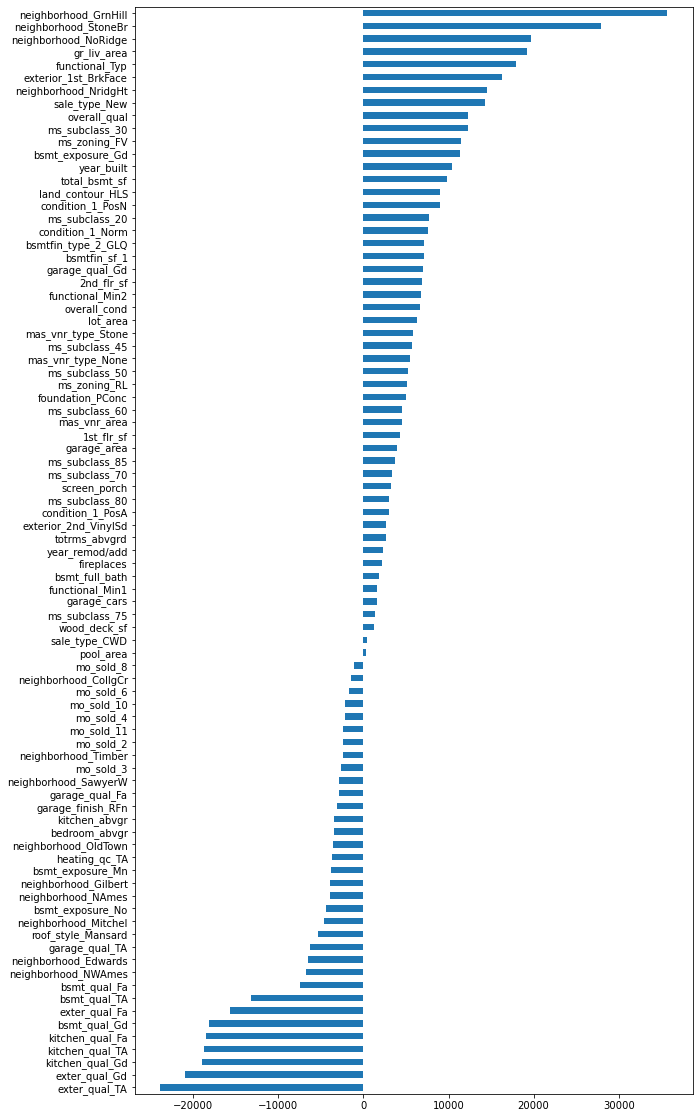

In [245]:
plt.figure(figsize=(10,20))
coef[np.abs(coef)>0].sort_values().plot(kind='barh')

In [246]:
#select subset of test data
X_test = test_data[features1]
#predict and assign to saleprice column
submit['SalePrice'] = lasso.predict(X_test)

In [247]:
submit.head()

,Id,SalePrice
0,2658,153561.2444
1,2718,154574.9184
2,2414,217456.4496
3,1989,116146.5201
4,625,176746.0128


In [248]:
#Print csv file
submit.to_csv('../Model/1_backward_elimination_lasso_no_poly.csv',index=False)

In [249]:
# RidgeCV
ridgecv = RidgeCV(alphas=np.logspace(0,5,200))
ridgecv.fit(X,y)
# Ridge
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X,y)
ridge_score = ridge.score(X,y)
ridge_rmse = np.sqrt(metrics.mean_squared_error(y,ridge.predict(X)))
ridge_cv_score = cross_val_score(ridge,X,y).mean()
ridge_cv_rmse = np.abs(cross_val_score(ridge,X,y,scoring='neg_root_mean_squared_error')).mean()

In [250]:
#select subset of test data
X_test = test_data[features1]
#predict and assign to saleprice column
submit['SalePrice'] = ridge.predict(X_test)

In [251]:
submit.head()

,Id,SalePrice
0,2658,136816.4577
1,2718,154382.4283
2,2414,215749.0951
3,1989,135147.6253
4,625,177531.6656


In [252]:
#Print csv file
submit.to_csv('../Model/1_backward_elimination_ridge_no_poly.csv',index=False)

## 2: All features model + subset selection with Lasso/Elasticnet

In [281]:
features2 = [col for col in train_data.columns if col != 'saleprice']
len(features2)

283

In [254]:
all_model_fit_report(features2)

     
         LinearRegression
         R2 Score on training data: 0.9445
         RMSE on training data :18666.5683
         Estimated R2 Score on unseen data: -1.6729022212400028e+19
         Estimated RMSE on unseen data: 246421202368388.88

         Ridge
         R2 Score on training data: 0.9408
         RMSE on training data :19284.4329
         Estimated R2 Score on unseen data: 0.9208
         Estimated RMSE on unseen data: 22248.339

         Lasso
         R2 Score on training data: 0.9354
         RMSE on training data :20149.578
         Estimated R2 Score on unseen data: 0.9209
         Estimated RMSE on unseen data: 22248.7737   

         ElasticNet
         Opimal l1 ration: 1.0
         R2 Score on training data: 0.9354
         RMSE on test training :20149.578
         Estimated R2 Score on unseen data: 0.9209
         Estimated RMSE on unseen data: 22248.7737         
        


'Ridge'

In [255]:
# Build lasso model
# Create X,y
X = train_data[features2]
y = train_data['saleprice']

In [256]:
#LassoCV
lassocv = LassoCV(n_alphas=200)
lassocv.fit(X,y)
#Lasso
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X,y)
lasso_score = lasso.score(X,y)
lasso_rmse = np.sqrt(metrics.mean_squared_error(y,lasso.predict(X)))
lasso_cv_score = cross_val_score(lasso,X,y).mean()
lasso_cv_rmse = np.abs(cross_val_score(lasso,X,y,scoring='neg_root_mean_squared_error')).mean()

In [257]:
lassocv.alpha_

63.716189862025175

In [258]:
lasso_cv_rmse

22248.773709458128

In [1881]:
coef = pd.Series(lasso.coef_,index=features2)

In [1882]:
#number of remaining columns
coef[coef!=0].count()

139

In [1883]:
#number of eliminated columns
coef[coef==0].count()

199

In [1884]:
coef[coef==0].index

Index(['year_remod/add', 'bsmtfin_sf_1', '2nd_flr_sf', 'gr_liv_area',
       'full_bath', 'totrms_abvgrd', 'garage_cars', 'overall_qual year_built',
       'overall_qual year_remod/add', 'overall_qual totrms_abvgrd',
       ...
       'mo_sold_12', 'mo_sold_4', 'mo_sold_8', 'sale_type_CWD',
       'sale_type_Con', 'sale_type_ConLD', 'sale_type_ConLI',
       'sale_type_ConLw', 'sale_type_Oth', 'sale_type_WD '],
      dtype='object', length=199)

In [1885]:
coef.sort_values().head(10) #look at features that affect saleprice negatively

kitchen_qual_Fa      -16447.0112
kitchen_qual_TA      -12941.4715
kitchen_qual_Gd      -12760.0418
roof_style_Mansard   -11397.5678
overall_qual         -10247.2803
garage_area           -9195.3051
bsmt_qual_Gd          -9101.8050
exter_qual_TA         -8537.2330
bsmt_unf_sf           -7565.2065
exter_qual_Gd         -7045.1469
dtype: float64

In [1886]:
coef.sort_values().tail(10) #look at features that  affect saleprice postively

bsmt_exposure_Gd              9674.2043
overall_qual garage_area     12721.5951
neighborhood_Crawfor         12849.5808
sale_type_New                13400.4706
overall_qual total_bsmt_sf   13583.4967
exterior_1st_BrkFace         14006.7665
functional_Typ               15488.7704
neighborhood_StoneBr         22626.4787
overall_qual gr_liv_area     28870.8697
neighborhood_GrnHill         33979.8702
dtype: float64

<AxesSubplot:>

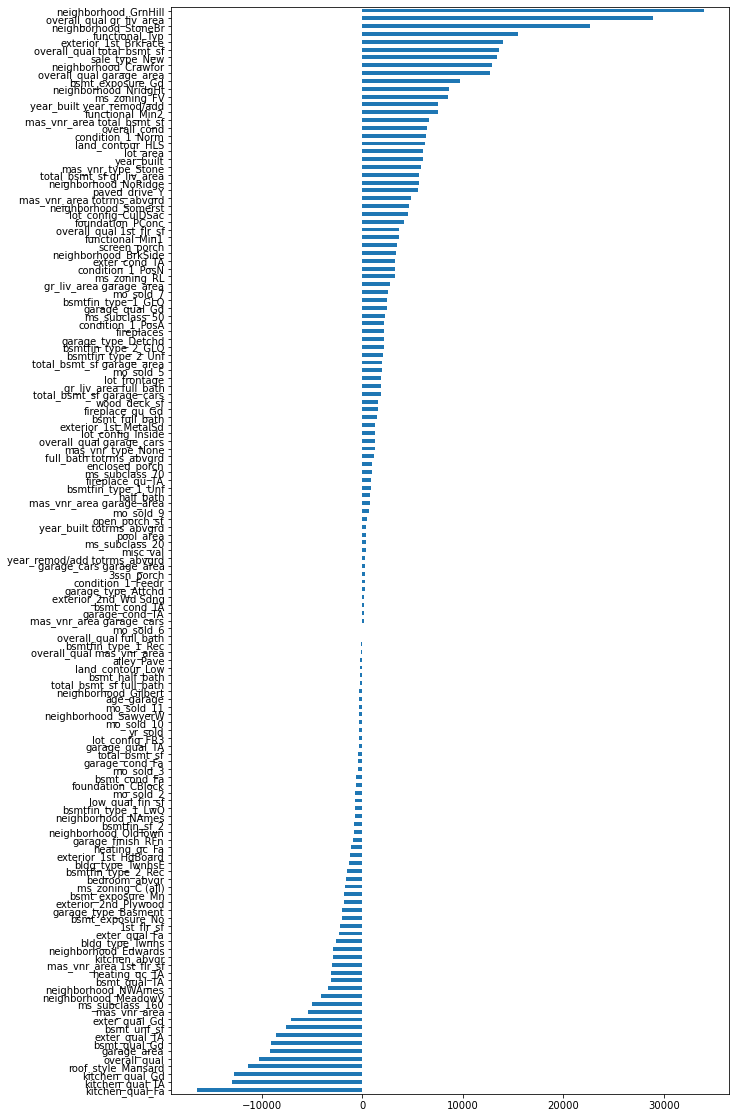

In [1887]:
plt.figure(figsize=(10,20))
coef[np.abs(coef)>0].sort_values().plot(kind='barh')

In [259]:
#select subset of test data
X_test = test_data[features2]
#predict and assign to saleprice column
submit['SalePrice'] = lasso.predict(X_test)

In [260]:
submit.head()

,Id,SalePrice
0,2658,152735.8546
1,2718,148520.0861
2,2414,214246.0150
3,1989,113364.1816
4,625,172191.6236


In [261]:
#Print csv file
submit.to_csv('../Model/2_all_features_lasso_no_poly.csv',index=False)

## 3: All features model + Lasso High alpha to check features importance

In [268]:
# Build lasso model
# Create X,y
X = train_data[features2]
y = train_data['saleprice']

**alpha = 300**

In [269]:
#Lasso
lasso = Lasso(alpha=300)
lasso.fit(X,y)
lasso_score = lasso.score(X,y)
lasso_rmse = np.sqrt(metrics.mean_squared_error(y,lasso.predict(X)))
lasso_cv_score = cross_val_score(lasso,X,y).mean()
lasso_cv_rmse = np.abs(cross_val_score(lasso,X,y,scoring='neg_root_mean_squared_error')).mean()

In [270]:
lasso_cv_rmse

23538.413218234175

In [271]:
#select subset of test data
X_test = test_data[features2]
#predict and assign to saleprice column
submit['SalePrice'] = lasso.predict(X_test)

In [272]:
submit.head()

,Id,SalePrice
0,2658,167219.9748
1,2718,148964.2479
2,2414,217875.9927
3,1989,106301.5459
4,625,173256.4387


In [273]:
#Print csv file
submit.to_csv('../Model/2_all_features_lasso_a300_no_poly.csv',index=False)

**alpha = 500**

In [274]:
#Lasso
lasso = Lasso(alpha=500)
lasso.fit(X,y)
lasso_score = lasso.score(X,y)
lasso_rmse = np.sqrt(metrics.mean_squared_error(y,lasso.predict(X)))
lasso_cv_score = cross_val_score(lasso,X,y).mean()
lasso_cv_rmse = np.abs(cross_val_score(lasso,X,y,scoring='neg_root_mean_squared_error')).mean()

In [275]:
lasso_cv_rmse

24466.5991028264

In [1906]:
coef = pd.Series(lasso.coef_,index=features2)

In [1907]:
#number of remaining columns
coef[coef!=0].count()

46

In [1908]:
#number of eliminated columns
coef[coef==0].count()

292

In [1909]:
coef[coef==0].index

Index(['overall_qual', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_2',
       'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area',
       'bsmt_half_bath', 'full_bath',
       ...
       'mo_sold_6', 'mo_sold_8', 'mo_sold_9', 'sale_type_CWD', 'sale_type_Con',
       'sale_type_ConLD', 'sale_type_ConLI', 'sale_type_ConLw',
       'sale_type_Oth', 'sale_type_WD '],
      dtype='object', length=292)

In [1910]:
coef.sort_values().head(10) #look at features that affect saleprice negatively

bsmt_qual_Gd           -8617.6500
mas_vnr_type_BrkFace   -5090.2613
bsmt_unf_sf            -4227.1019
kitchen_qual_Gd        -3492.3114
foundation_CBlock      -2811.3921
heating_qc_TA          -2716.1665
kitchen_qual_TA        -2674.2536
kitchen_abvgr          -2316.5894
bedroom_abvgr          -2221.8550
bsmt_exposure_No       -1524.7019
dtype: float64

In [1911]:
coef.sort_values().tail(10) #look at features that  affect saleprice postively

bsmtfin_sf_1                  4131.8985
year_built                    4585.9904
overall_cond                  5124.0034
total_bsmt_sf gr_liv_area     5298.5345
lot_area                      5924.8974
bsmt_exposure_Gd              5963.2822
year_built year_remod/add     8988.7311
sale_type_New                12097.7472
overall_qual total_bsmt_sf   14488.2376
overall_qual gr_liv_area     31990.7898
dtype: float64

<AxesSubplot:>

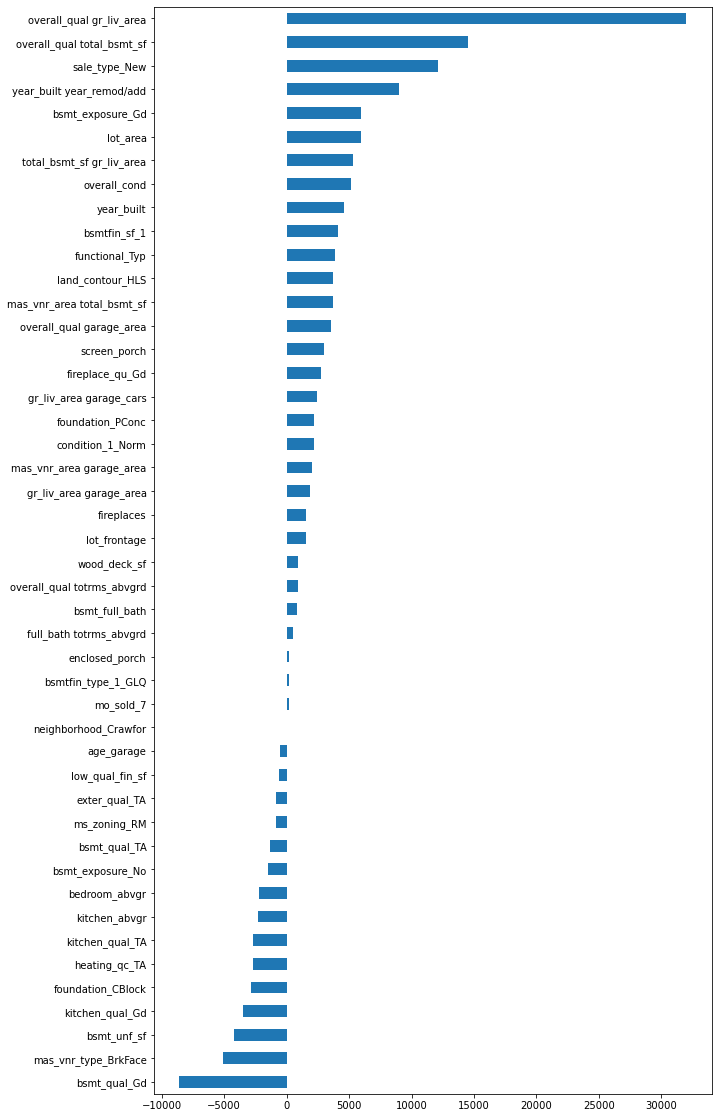

In [1912]:
plt.figure(figsize=(10,20))
coef[np.abs(coef)>0].sort_values().plot(kind='barh')

In [276]:
#select subset of test data
X_test = test_data[features2]
#predict and assign to saleprice column
submit['SalePrice'] = lasso.predict(X_test)

In [277]:
submit.head()

,Id,SalePrice
0,2658,165879.8606
1,2718,152514.6558
2,2414,218942.0837
3,1989,104486.2115
4,625,175808.2997


In [278]:
#Print csv file
submit.to_csv('../Model/2_all_features_lasso_a500_no_poly.csv',index=False)